In [1]:
import matplotlib.pylab as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.lines import Line2D
import numpy as np
import pandas as pd
import seaborn as sns

from ocddetection.data import SENSORS

In [2]:
def read_meta(path):
    df = pd.read_csv(path, index_col=0)
    df.index = pd.TimedeltaIndex(df.index).rename('ms')
    
    return df

In [3]:
meta = [
    [
        read_meta(f'/opportunity/augmented/including_original/S{subject}-ADL{run}-META.csv')
        for run in range(1, 6)
    ]
    for subject in range(1, 5)
]

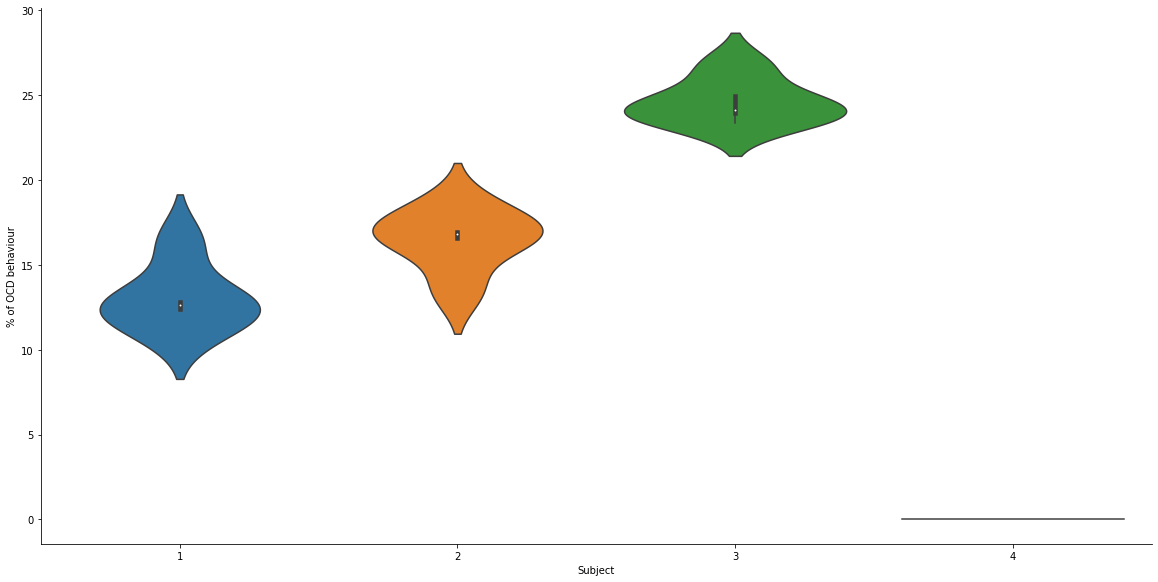

In [14]:
data = np.array([[run['ocd'].sum() / len(run) * 100 for run in adl] for adl in meta]).T
    
grid = sns.catplot(
    data=pd.DataFrame(data, columns=range(1, 5)),
    height=8,
    aspect=2,
    kind='violin'
)

grid.set(
    xlabel='Subject',
    ylabel='% of OCD behaviour'
)

plt.savefig('/ocd-detection/docs/pos-neg.png', bbox_inches='tight')

In [5]:
data = np.mean([[run['ocd'].sum() / len(run) * 100 for run in adl] for adl in meta], axis=-1)

In [19]:
df = pd.DataFrame(enumerate(data, start=1), columns=['subject', 'pos'])
df['neg'] = 100 - df['pos']

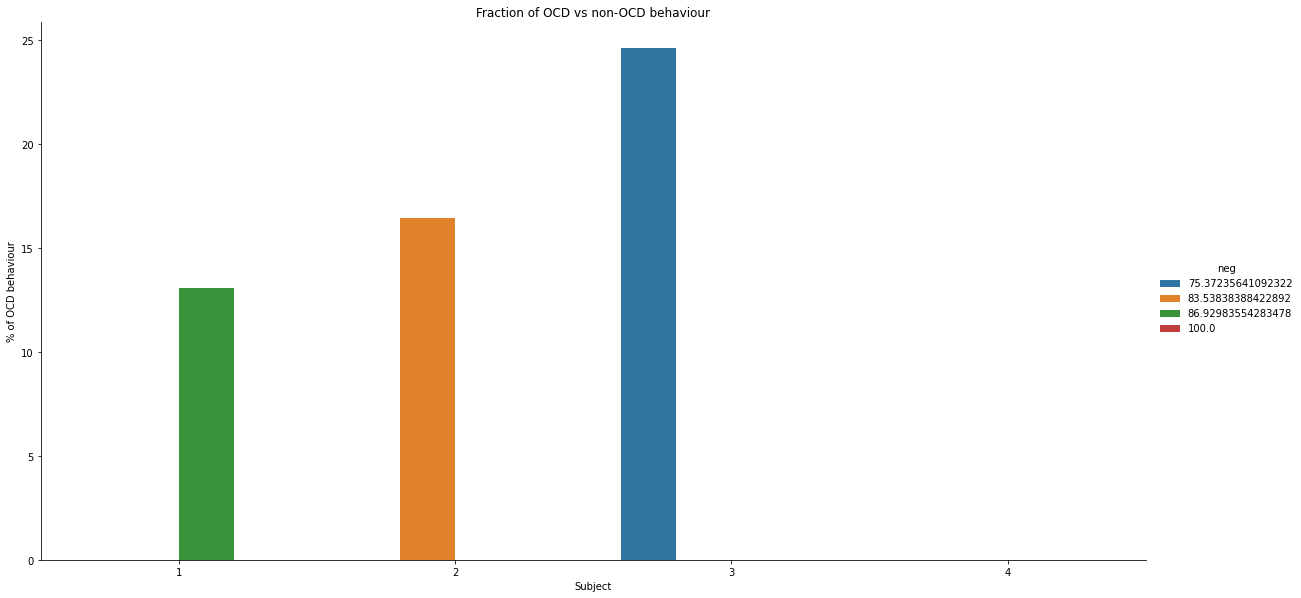

In [22]:
grid = sns.catplot(
    x='subject',
    y='pos',
    hue='neg',
    data=df,
    height=8,
    aspect=2,
    kind='bar'
)

grid.set(
    title='Fraction of OCD vs non-OCD behaviour',
    xlabel='Subject',
    ylabel='% of OCD behaviour'
)

plt.show()

In [6]:
for subject in meta:
    print(len(subject[4]))

54969
33678
44479
24550


In [14]:
(54969 * 0.95 + 33678 * 0.915 + 44479 * 0.933) / (54969 + 33678 + 44479)

0.935465851899704

## Subject 1

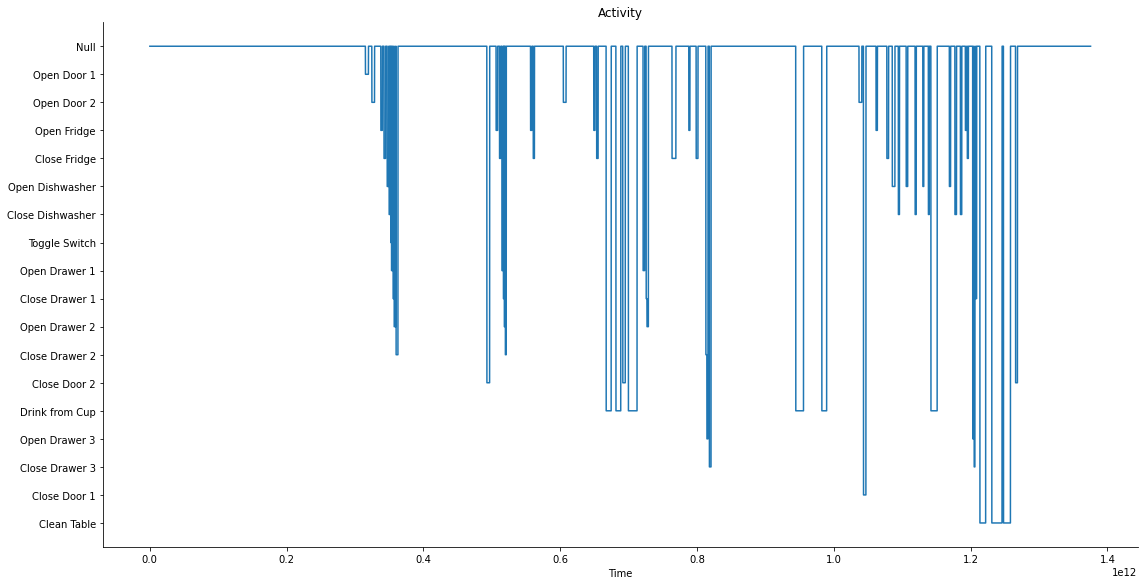

In [6]:
grid = sns.relplot(data=meta[3][0]['activity'], kind='line', height=8, aspect=2)

grid.set(
    title='Activity',
    xlabel='Time',
    ylabel=''
)

plt.show()